# Test Example: Reqression
This example investigates how linear regression learns a model from data.  
This example also shows effect of changin model capacity in overfitting and under fitting  
This example is based on chapter 5 of Deep Learning book written by Goodfellow and Bengio  
author: ebrahim.soroush@gmail.com

In [2]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

/home/esoroush/VirtualEnvs/dataMining/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Define unknow function for regression:  
```math
f = a[0] * x^2 + b[1] * x + b[0]
```

In [3]:
def fcn(x):
    a = [-1, 2, 1]
    return np.sum([np.power(x, i)*a[len(a)-1-i] for i in range(len(a))], axis=0)
def make_ploynomial(x, n):
    x = x.reshape(-1, 1)
    return np.array([np.power(x, n-1-i) for i in range(n)]).T.reshape(-1, n)

Preparing data

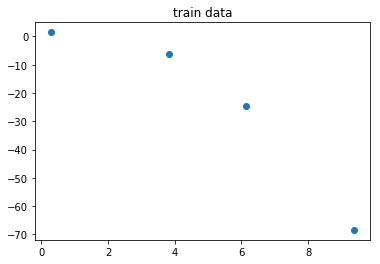

In [4]:
x = 10*np.random.rand(5)
y = fcn(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
plt.scatter(x_train, y_train)
plt.title("train data")

Now lets solve equition $`y=a*x+b`$ with MSE cost function  
According to Eq 5.12:
```math
w = (x_train.T * x_train)^-1*x_train.T*y_train
```

For capaicty: 2, weights are: [[ -7.61737522]
 [ 13.06524686]] and loss is: 148.386644577
For capaicty: 3, weights are: [[-1.]
 [ 2.]
 [ 1.]] and loss is: 153.377834107
For capaicty: 15, weights are: [[  2.08368510e-06]
 [  5.19611058e-06]
 [ -2.80323322e-04]
 [ -2.31065974e-03]
 [  1.16177574e-02]
 [  9.09140706e-02]
 [  7.03675747e-01]
 [  7.44978333e+00]
 [ -1.35496220e+02]
 [  3.93875244e+02]
 [ -6.51132812e+01]
 [  1.01384570e+03]
 [ -3.76830000e+04]
 [  1.33090000e+05]
 [ -3.41405000e+04]] and loss is: 387.50070691


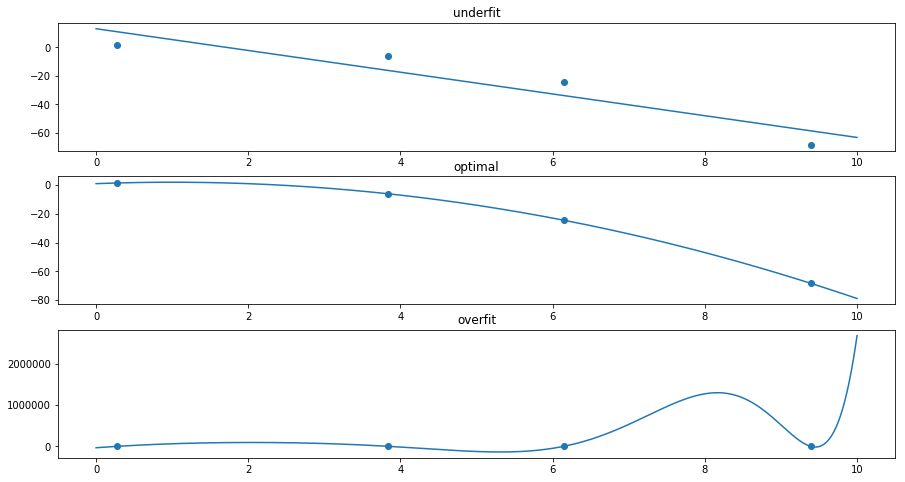

In [5]:
X = x_train.reshape(-1, 1)
Y = y_train.reshape(-1, 1)
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(3, figsize=(15, 8))
capacities = [2, 3, 15]
titles = ["underfit", "optimal", "overfit"]
for index, capacity in enumerate(capacities):
    X = make_ploynomial(x_train, capacity)
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y)).reshape(-1, 1)
    loss = np.linalg.norm(np.dot(X,w)-y_train)
    print("For capaicty: {}, weights are: {} and loss is: {}".format(capacity, w, loss))
    ax[index].set_title(titles[index])
    ax[index].scatter(x_train, y_train)
    ax[index].plot(x, np.dot(make_ploynomial(x, capacity), w))

Linear regression using sklearn library

In [ ]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

plt.scatter(x_train, y_train)
plt.plot(x, lr.predict(x.reshape(-1, 1)))
np.linalg.norm(lr.predict(x_train.reshape(-1, 1))-y_train)